In [42]:
import os
import sys
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pycausal.pycausal import pycausal

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.app import App

# stop the warning clutter
import warnings
warnings.filterwarnings('ignore')

In [2]:
pc = pycausal()
pc.start_vm()

In [4]:
aitia = App()

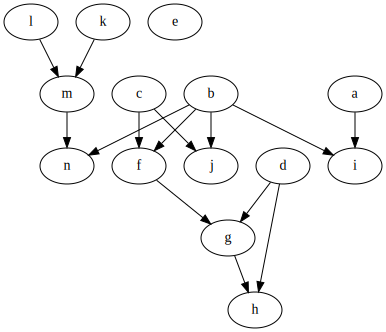

In [5]:
scm3 = aitia.data.scm3()
scm3.cgm.draw()

In [6]:
target_graph_str = str(scm3.cgm.draw())

In [21]:
df = scm3.sample(2000)
df

,l,k,m,e,d,c,b,n,j,f,g,h,a,i
0,-1.398501,0.051023,-0.689075,1.359502,1.520304,0.319326,1.688618,1,1,1,0.762883,1.095784,0.505377,1
1,1.035543,-0.866934,-0.213498,0.372900,-1.064862,1.067967,-1.135793,1,0,0,-1.362938,-1.738727,-0.361189,0
2,0.673608,1.757443,1.802325,-1.086796,0.520088,-0.769060,-0.577600,0,1,1,2.108837,2.051682,0.348629,0
3,-0.223591,0.025966,0.390842,1.216933,-0.207316,1.493090,-0.085254,1,0,0,-0.905542,0.233139,-1.034531,1
4,-0.435354,-0.427559,-0.895876,-0.062409,1.657229,0.050404,-0.985801,1,0,0,3.635875,3.103628,2.950294,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.477021,0.651381,1.142222,-0.861206,1.377958,-0.095780,-1.423065,0,0,0,1.600652,2.338487,-0.021409,0
1996,-1.050126,1.346679,-0.963138,-0.576527,-0.696500,-0.478309,-0.175500,0,0,1,-0.913485,-2.361702,-1.084905,1
1997,1.202310,-0.707809,0.667356,-1.516417,-1.306219,1.064454,-0.603399,0,1,0,-2.922943,-2.395212,-0.870047,1
1998,0.419926,0.410916,0.698155,0.531630,-1.571950,-0.447751,-1.395048,0,0,0,-2.808837,-3.049216,-1.325074,0


In [24]:
analysis_results, summary = aitia.run_analysis(df, 
                                               target_graph_str=target_graph_str, 
                                               algorithm_list=[
                                                   aitia.algo_runner.PC,
                                                   aitia.algo_runner.FCI
                                               ],
                                               pc=pc)
summary

,Algorithm,Isomorphic to Target?,AURC,SHD
0,PC,False,1.0,0
1,FCI,False,1.0,0


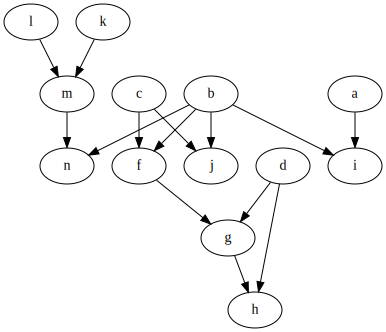

In [25]:
analysis_results[0]['causal_graph'].draw()

In [46]:
from sklearn import mixture
X = df

# see https://github.com/vlavorini/ClusterCardinality/blob/master/Cluster%20Cardinality.ipynb

In [47]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [48]:
n_clusters=np.arange(2, 20)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=mixture.GaussianMixture(n, n_init=2).fit(X) 
        tmp_bic.append(gmm.bic(X))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

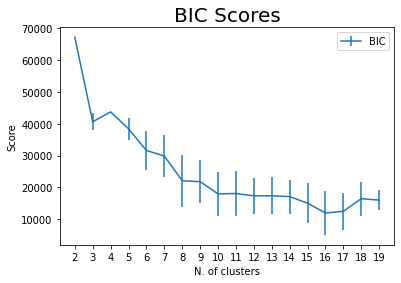

In [49]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

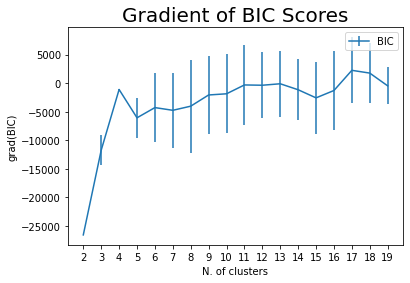

In [50]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

In [51]:
gmm = mixture.GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)

In [16]:
list(X)

['f', 'h', 'g', 'e', 'b', 'a', 'c', 'd']

In [11]:
X.shape

(1000, 8)

In [52]:
data_new = gmm.sample(2000)
X_new = pd.DataFrame(data_new[0], columns=list(X))
X_new

,l,k,m,e,d,c,b,n,j,f,g,h,a,i
0,-2.108021,1.845476,0.821168,-3.038900,-2.173852,-0.328213,0.240576,-0.123343,-0.571045,0.973122,-3.707266,-5.056224,-0.265750,0.999935
1,-1.443538,0.715598,-0.326994,-3.394961,-1.460887,0.336685,-0.043891,0.153683,-0.030908,1.372468,-1.639368,-5.418031,0.393249,1.001100
2,-0.468999,0.296054,-0.456665,-1.528090,-0.932610,-0.098639,0.755077,1.051264,0.297962,0.360132,-2.730296,-3.418169,-1.128158,1.000564
3,-1.217911,0.838718,-1.216932,-1.975315,-2.758380,0.093002,0.031195,-0.144215,-0.169671,0.685808,-5.162706,-5.406335,-0.273548,0.999369
4,-0.098572,-0.813887,-2.125630,-2.446906,-0.830515,0.862446,0.006447,0.789119,0.726149,1.141262,-0.927668,-4.940126,0.256579,1.000902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.471873,-0.640845,-2.309080,2.895052,-0.933703,-0.597328,-2.491920,0.998613,-0.101447,0.748426,-0.511344,-1.482207,0.324773,-0.050685
1996,-0.995774,0.657083,0.160376,0.809688,-0.329234,-0.871310,2.628685,0.998655,-0.126450,0.833749,0.512640,1.286442,-1.293308,0.618652
1997,0.015136,1.737608,0.672490,-0.144010,-0.377980,-1.432038,-0.472819,1.001074,1.387673,0.933675,0.059973,-1.039014,-1.891800,0.831475
1998,-0.304214,1.210472,-0.663987,3.025675,1.907960,-0.588255,0.084791,1.000042,0.606864,0.726012,0.355552,2.270658,0.254878,0.880310


In [31]:
analysis_results2, summary2 = aitia.run_analysis(X_new, 
                                               target_graph_str=target_graph_str, 
                                               algorithm_list=[
                                                   aitia.algo_runner.PC,
                                                   aitia.algo_runner.FCI
                                               ],
                                               pc=pc)
summary2

,Algorithm,Isomorphic to Target?,AURC,SHD
0,PC,False,0.966667,1
1,FCI,False,0.966667,1


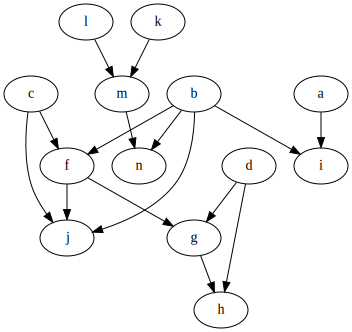

In [32]:
analysis_results2[0]['causal_graph'].draw()